# K-means clustering

# Predicting Mall customers

This notebook looks into using various Python-based data science libraries in an attempt to build a model capable of predicting spending of different customers

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Problem is based on clustering. Higher number represent that customers spent more. We don't have an idea about client segmentation, we don't the answer so we need to use K-Means.


## 2. Data

There is also a version of it available on Kaggle. https://www.kaggle.com/akram24/mall-customers?select=Mall_Customers.csv

## 3. Evaluation

we will try to get as much as accuracy from our model

# K-Means intuition

1. it will take data into some groups, whcih we will call as cluster.
2. K-Means can work on different kind of dimension.
3. Most important setp is to choose number K of clusters.
4. Select at random K points, the centroids.
5. Assign each data point to the closest centroid, that forms K clusters.
6. Compute and place the new centroid of each cluster.
7. Reassign each data point to the new closest centroid. If any reassignmnet took place, need to go to step 6, otherwise go to FIN.

# Random Initialization Trap

1. will the end result be different if centroid is on different location.
2. Suppose we have 3 clusters. But the clusters centroid is not in center.
3. Now if we draw some equai-distant line from center of 2D space, then we can find 3 different clusters but it will be same as previous.

# Choosing the right numbers of clusters

1. We need to work with WCSS equation.
2. We will calculate distance from one points and we do the square
3. Then we do square for all cluster and do summation.

# Import the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the mall dataset with pandas

In [2]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [3, 4]].values

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# Let's find out how many of each class there
df["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

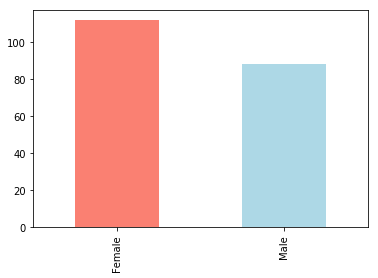

In [8]:
df["Genre"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Are there any missing values?
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Using the elbow method to find the optimal number of clusters

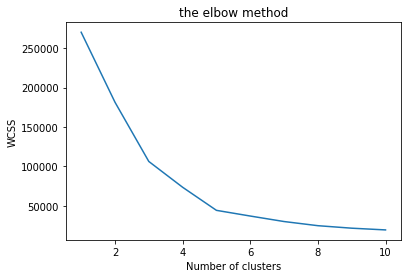

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Applying k-means to the mall dataset

In [12]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [13]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [14]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

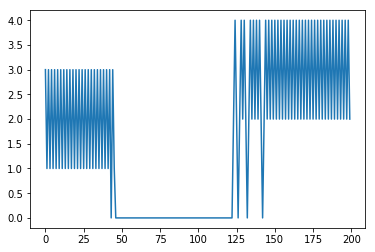

In [15]:
plt.plot(y_kmeans)

# Visualising the clusters

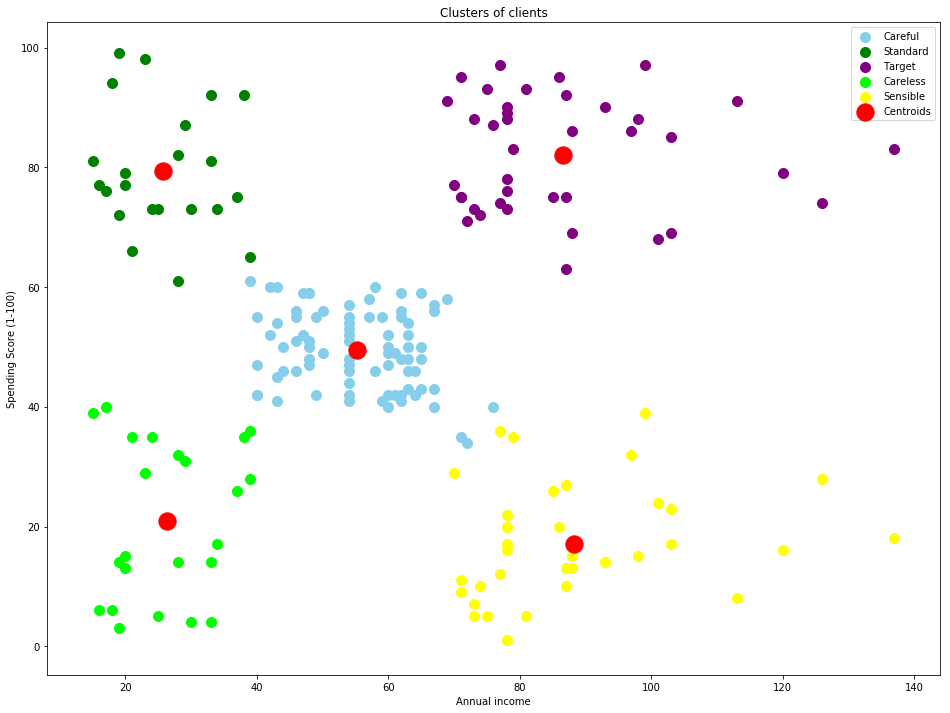

In [16]:
plt.figure(figsize=(16, 12))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "skyblue", label = "Careful")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "green", label = "Standard")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "purple", label = "Target")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "lime", label = "Careless")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "yellow", label = "Sensible")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red", label = "Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual income")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Hierarchical Clustering

In [17]:
# Importing the libraries

# Importing the dataset

### Using the dendrogram to find the optimal number of clusters

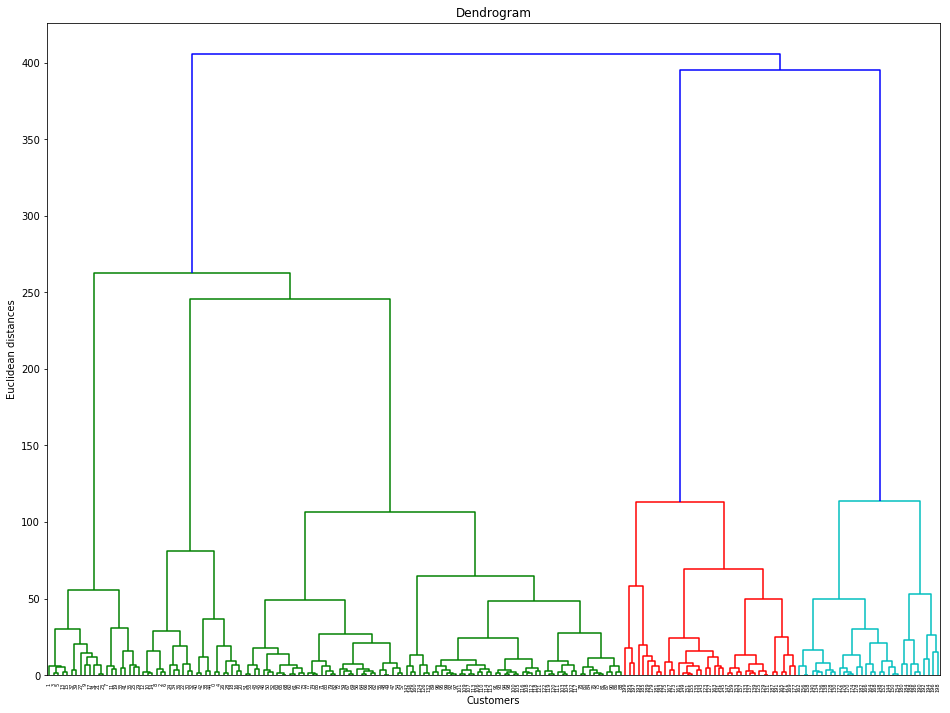

In [19]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16, 12))

dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity ="euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

### Visualising the clusters

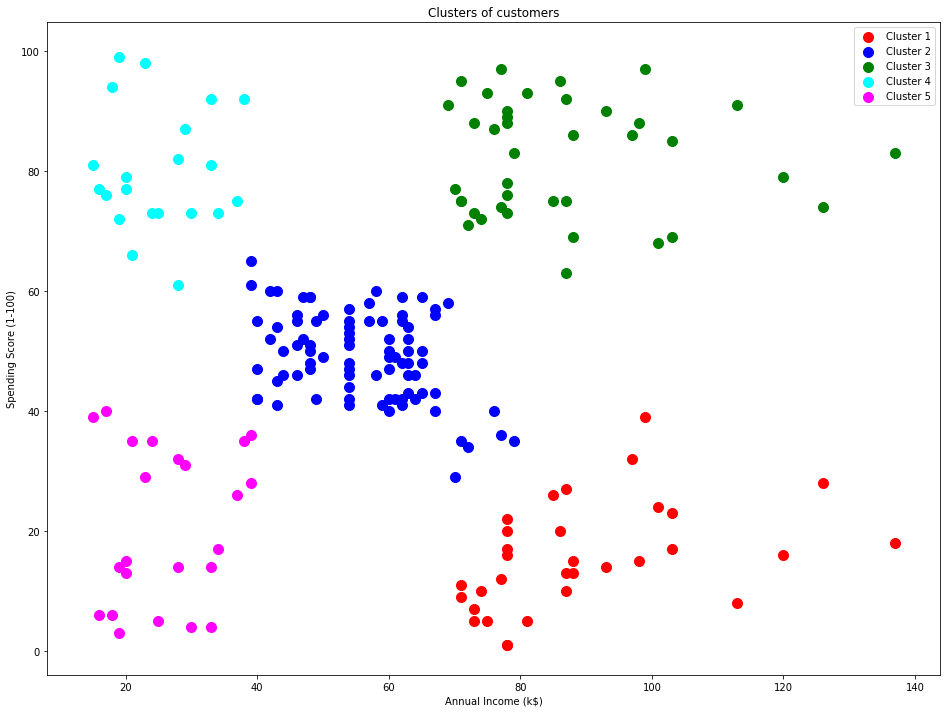

In [21]:
plt.figure(figsize=(16, 12))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()